<a href="https://colab.research.google.com/github/ErrorNginx/My-project-google-colab/blob/main/The_GitHub_History_of_the_Scala_Language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The GitHub History of the Scala Language**

Dengan hampir 30.000 komit dan sejarah yang mencakup lebih dari sepuluh tahun, Scala adalah bahasa pemrograman yang matang. Ini adalah bahasa pemrograman umum yang baru-baru ini menjadi salah satu bahasa yang menonjol bagi ilmuwan data.

Scala juga merupakan proyek sumber terbuka. Proyek sumber terbuka memiliki keuntungan bahwa seluruh riwayat pengembangannya -- siapa yang membuat perubahan, apa yang diubah, tinjauan kode, dll. -- tersedia untuk umum.

Kami akan membaca, membersihkan, dan memvisualisasikan repositori proyek dunia nyata Scala yang mencakup data dari sistem kontrol versi (Git) serta situs hosting proyek (GitHub). Kami akan mencari tahu siapa yang memiliki pengaruh paling besar pada pengembangannya dan siapa para ahli.

Dataset yang akan kami gunakan, yang sebelumnya telah ditambang dan diekstraksi dari GitHub, terdiri dari tiga file:

1. pulls_2011-2013.csv contains the basic information about the pull requests, and spans from the end of 2011 up to (but not including) 2014.
2. pulls_2014-2018.csv contains identical information, and spans from 2014 up to 2018.
3. pull_files.csv contains the files that were modified by each pull request.

In [1]:
# Importing pandas
import pandas as pd

# Loading in the data
pulls_one = pd.read_csv('/content/pulls_2011-2013.csv')
pulls_two = pd.read_csv('/content/pulls_2014-2018.csv')
pull_files = pd.read_csv('/content/pull_files.csv')

**Preparing and cleaning the data**
Pertama, kita perlu menggabungkan data dari dua DataFrame pull terpisah.

Selanjutnya, data mentah yang diekstraksi dari GitHub mengandung tanggal dalam format ISO8601. Namun, pandas mengimpornya sebagai string biasa. Untuk memudahkan analisis kita, kita perlu mengonversi string tersebut menjadi objek DateTime Python. Objek DateTime memiliki properti penting bahwa mereka dapat dibandingkan dan diurutkan.

Waktu pull request semuanya dalam UTC (dikenal juga sebagai Coordinated Universal Time). Namun, waktu komit, berada dalam waktu lokal penulis dengan informasi zona waktu (perbedaan jam dari UTC). Untuk memudahkan perbandingan, kita sebaiknya mengonversi semua waktu ke UTC.

In [2]:
# Append pulls_one to pulls_two
pulls = pulls_two.append(pulls_one, ignore_index=True)

# Convert the date for the pulls object
pulls['date'] = pd.to_datetime(pulls['date'], utc=True)

<ipython-input-2-5d26c9bc6580>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pulls = pulls_two.append(pulls_one, ignore_index=True)


The data extracted comes in two separate files. Merging the two DataFrames will make it easier for us to analyze the data in the future tasks.

In [3]:
# Merge the two DataFrames
data = pulls.merge(pull_files, on='pid')

The activity in an open source project is not very consistent. Some projects might be active for many years after the initial release, while others can slowly taper out into oblivion. Before committing to contributing to a project, it is important to understand the state of the project. Is development going steadily, or is there a drop? Has the project been abandoned altogether?

The data used in this project was collected in January of 2018. We are interested in the evolution of the number of contributions up to that date.

For Scala, we will do this by plotting a chart of the project's activity. We will calculate the number of pull requests submitted each (calendar) month during the project's lifetime. We will then plot these numbers to see the trend of contributions.

A helpful reminder of how to access various components of a date can be found in this exercise of Data Manipulation with pandas

Additionally, recall that you can group by multiple variables by passing a list to groupby(). This video from Data Manipulation with pandas should help!

<Axes: xlabel='year,month'>

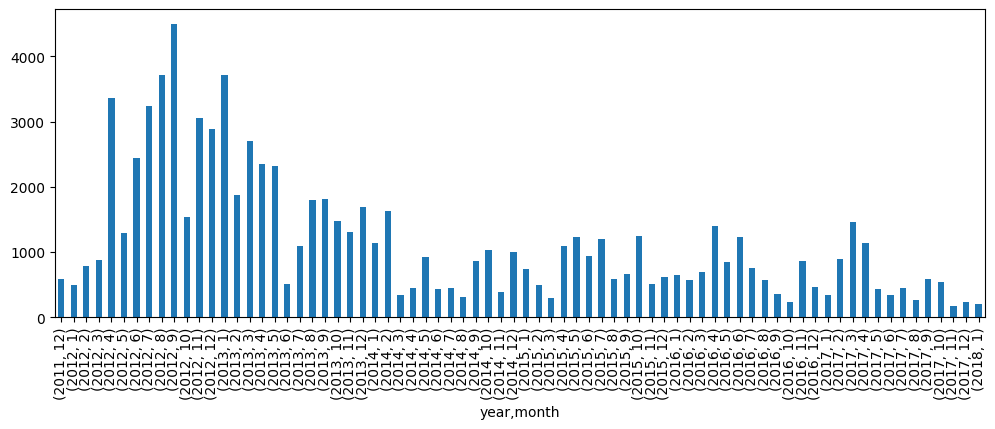

In [4]:
%matplotlib inline

# Create a column that will store the month
data['month'] = data['date'].dt.month

# Create a column that will store the year
data['year'] = data['date'].dt.year

# Group by month_year and count the pull requests
counts = data.groupby(['year', 'month'])['pid'].count()

# Plot the results
counts.plot(kind='bar', figsize = (12,4))